## Figures for analysis of combined MetaCells
This notebook reproduces Figures 2D, 3A-B, S4C, S5B-C, S7A-B

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
import re
import numpy as np
import glob
from pathlib import Path
from scipy import sparse
from copy import deepcopy
import pickle


<h3> Load data </h3>

In [3]:
out_dir = '/home/chanj3/data/Prostate_Organoid.LP.publication.100121/out.metacells.combined.100121/'

In [4]:
adata = sc.read_h5ad(out_dir + 'adata.metacells.combined.100121.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 920 × 15674
    obs: 'batch', 'metacell_sizes', 'metacell_centers', 'phenograph', 'MUT_vs_WT', 'time', 'treatment', 'prob_Basal_Org1', 'prob_Basal_Org2', 'prob_Basal_Org3', 'prob_Luminal_Org1', 'prob_Luminal_Org2', 'batch_plus_wt_cells', 'Basal Correlation', 'Basal vs Luminal by Correlation', 'HALLMARK_IL6_JAK_STAT3_SIGNALING', 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 'REACTOME_INTERFERON_ALPHA_BETA_SIGNALING', 'HALLMARK_INTERFERON_GAMMA_RESPONSE', 'ABBUD_LIF_SIGNALING_1_UP', 'FGFR_signature.Acevedo_etal'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'batch_colors', 'batch_plus_wt_cells_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'neighbors', 'paga', 'pca', 'phenograph_sizes', 'treatment_colors', 'umap'
    obsm: 'X_diffmap', 'X_draw_graph_fa', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'imputed', 'raw_counts'
    obsp: 'connectivities', 'distances'

### Figure 2D

In [14]:
sc.set_figure_params(fontsize=20)


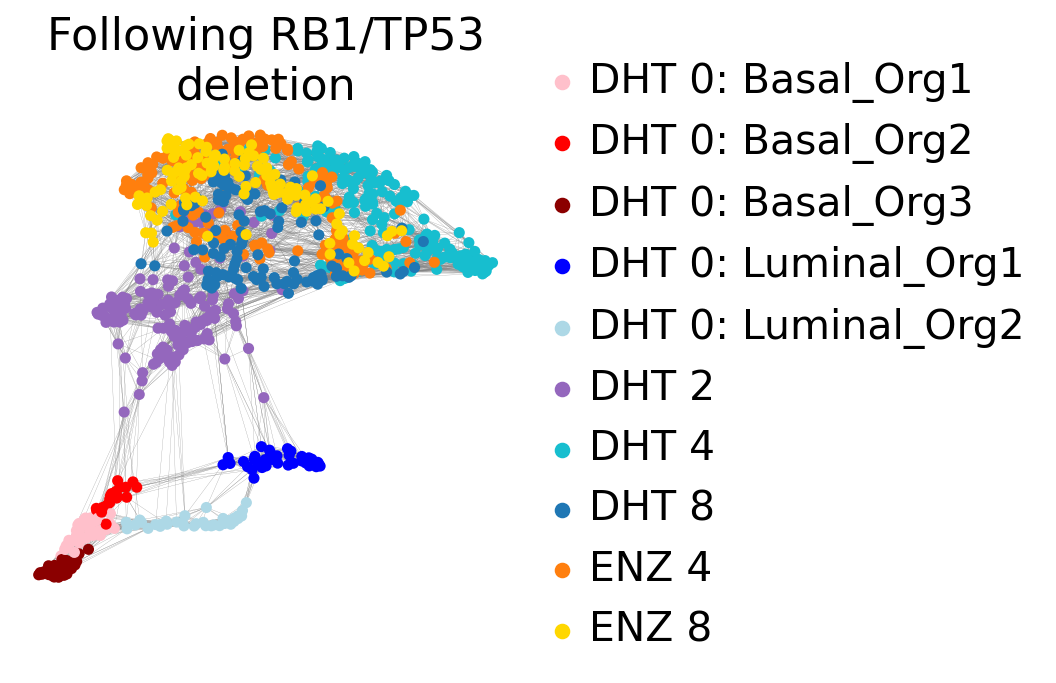

In [15]:
sc.pl.draw_graph(
    adata,
    color=['batch_plus_wt_cells'],
    frameon=False, use_raw = False,
    sort_order=False, vmax = 5, title = 'Following RB1/TP53\ndeletion', edges = True,
    ncols=2, s=100
)

### Figure S4C

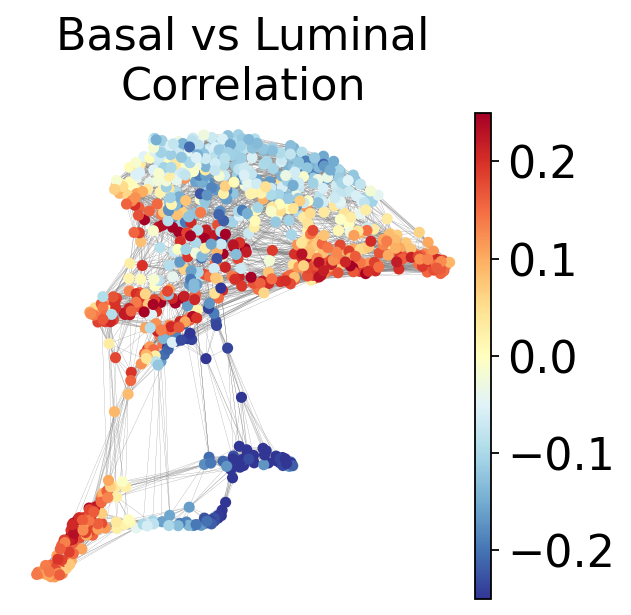

In [16]:
sc.pl.draw_graph(
    adata,
    color=['Basal Correlation'],
    color_map='RdYlBu_r',
    frameon=False, use_raw = False,
    sort_order=False, #vmax = 5,
    ncols=2, s=100, edges = True, vmin = -0.25, vmax = 0.25, title = 'Basal vs Luminal\nCorrelation'
)

### Figure 3A

In [18]:
norm_df = pd.DataFrame(adata.X, index=adata.obs.index, columns = adata.var.index)

In [20]:
gene_list = ['FGFR1','FGFR2','FGFR3','LIFR','IL6ST','MET','IL15RA','CCR2','CCR5']
sub_df = norm_df.loc[:,gene_list].groupby(adata.obs.batch, axis=0).agg(lambda x: x.mean())
scaled_sub_df = (sub_df-sub_df.min())/(sub_df.max()-sub_df.min())

In [21]:
order = scaled_sub_df.loc['DHT 2',:].sort_values(ascending=False).index

In [24]:
sc.set_figure_params(fontsize=15)

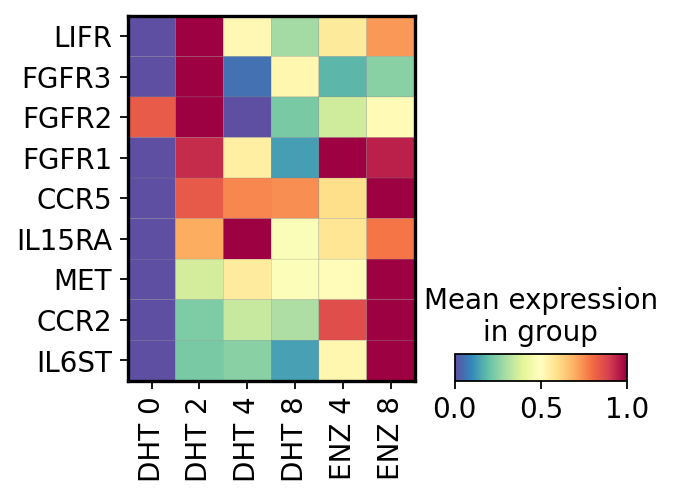

In [25]:
ax = sc.pl.matrixplot(adata, order, groupby='batch', dendrogram=False,
                   use_raw = False, standard_scale = 'var', swap_axes = True,
                   cmap = 'Spectral_r',
                   figsize=(4,3))


### Figure 3B

In [55]:
gsets = ['HALLMARK_IL6_JAK_STAT3_SIGNALING',
        'ABBUD_LIF_SIGNALING_1_UP',
       'REACTOME_INTERFERON_ALPHA_BETA_SIGNALING',
        'FGFR_signature.Acevedo_etal', 
       ]

In [56]:
titles = ['IL6_JAK_STAT3_SIGNALING',
        'LIF_SIGNALING',
       'IFN_ALPHA_BETA_SIGNALING',
          'FGFR_SIGNATURE'
       ]

In [57]:
sc.set_figure_params(fontsize=20)

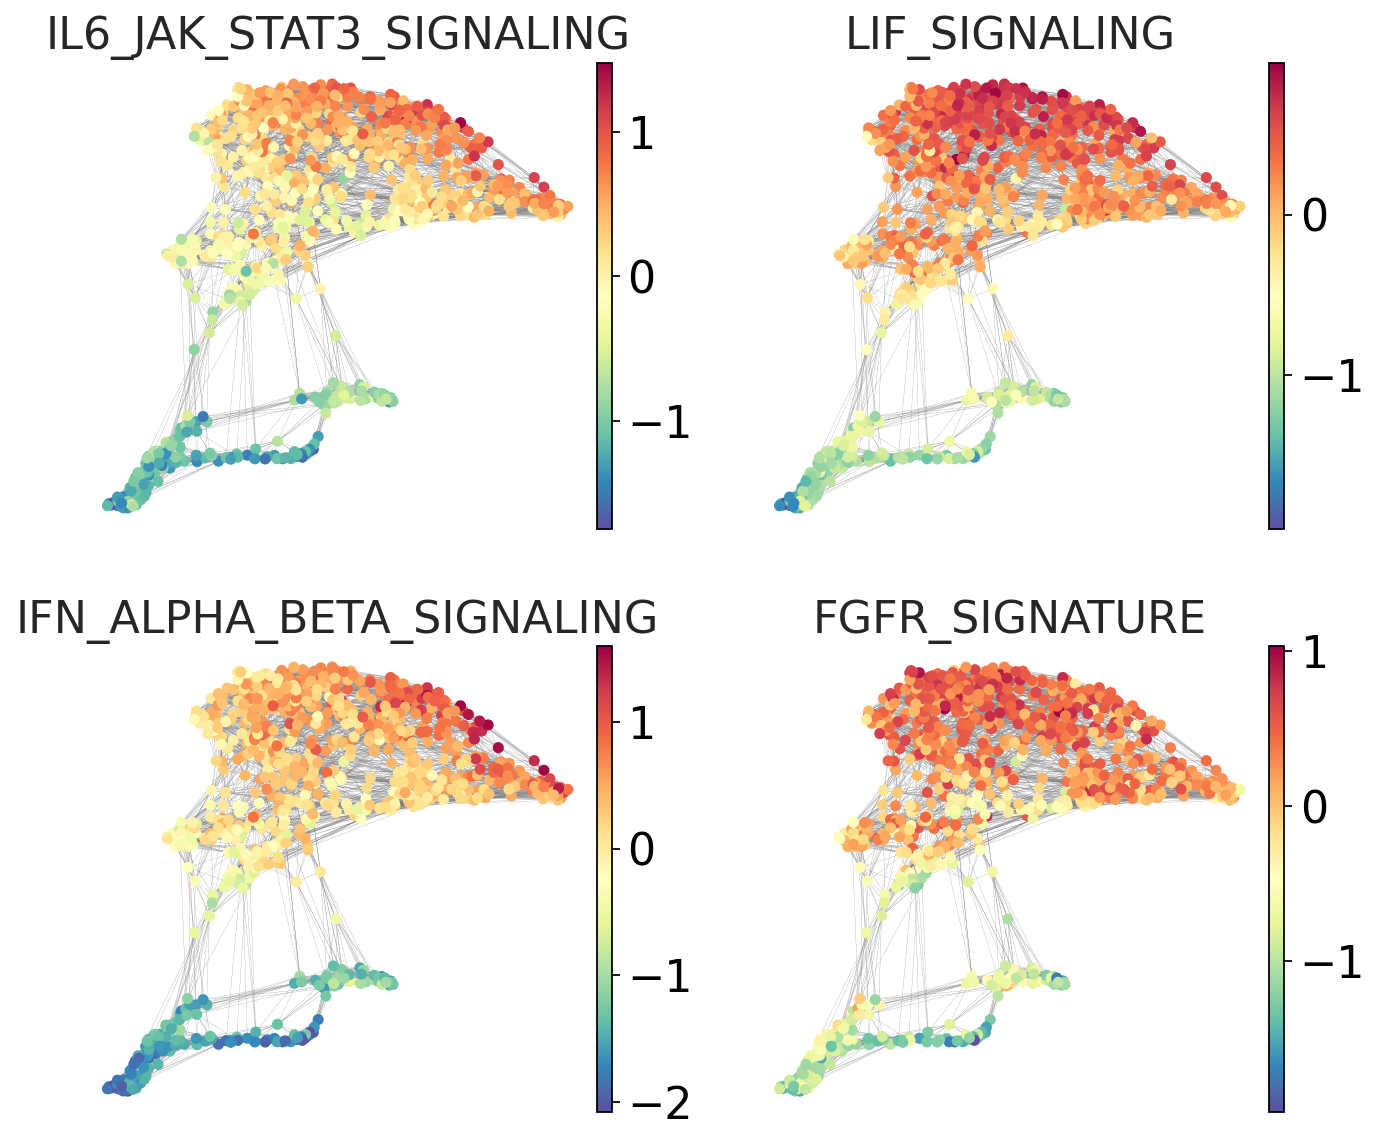

In [59]:
sc.pl.draw_graph(
    adata,
    color= gsets,
    color_map='Spectral_r',
    frameon=False, use_raw = False,
    sort_order=False, edges = True,
    ncols=2, s=100, title=titles,
)

### Figure S5B

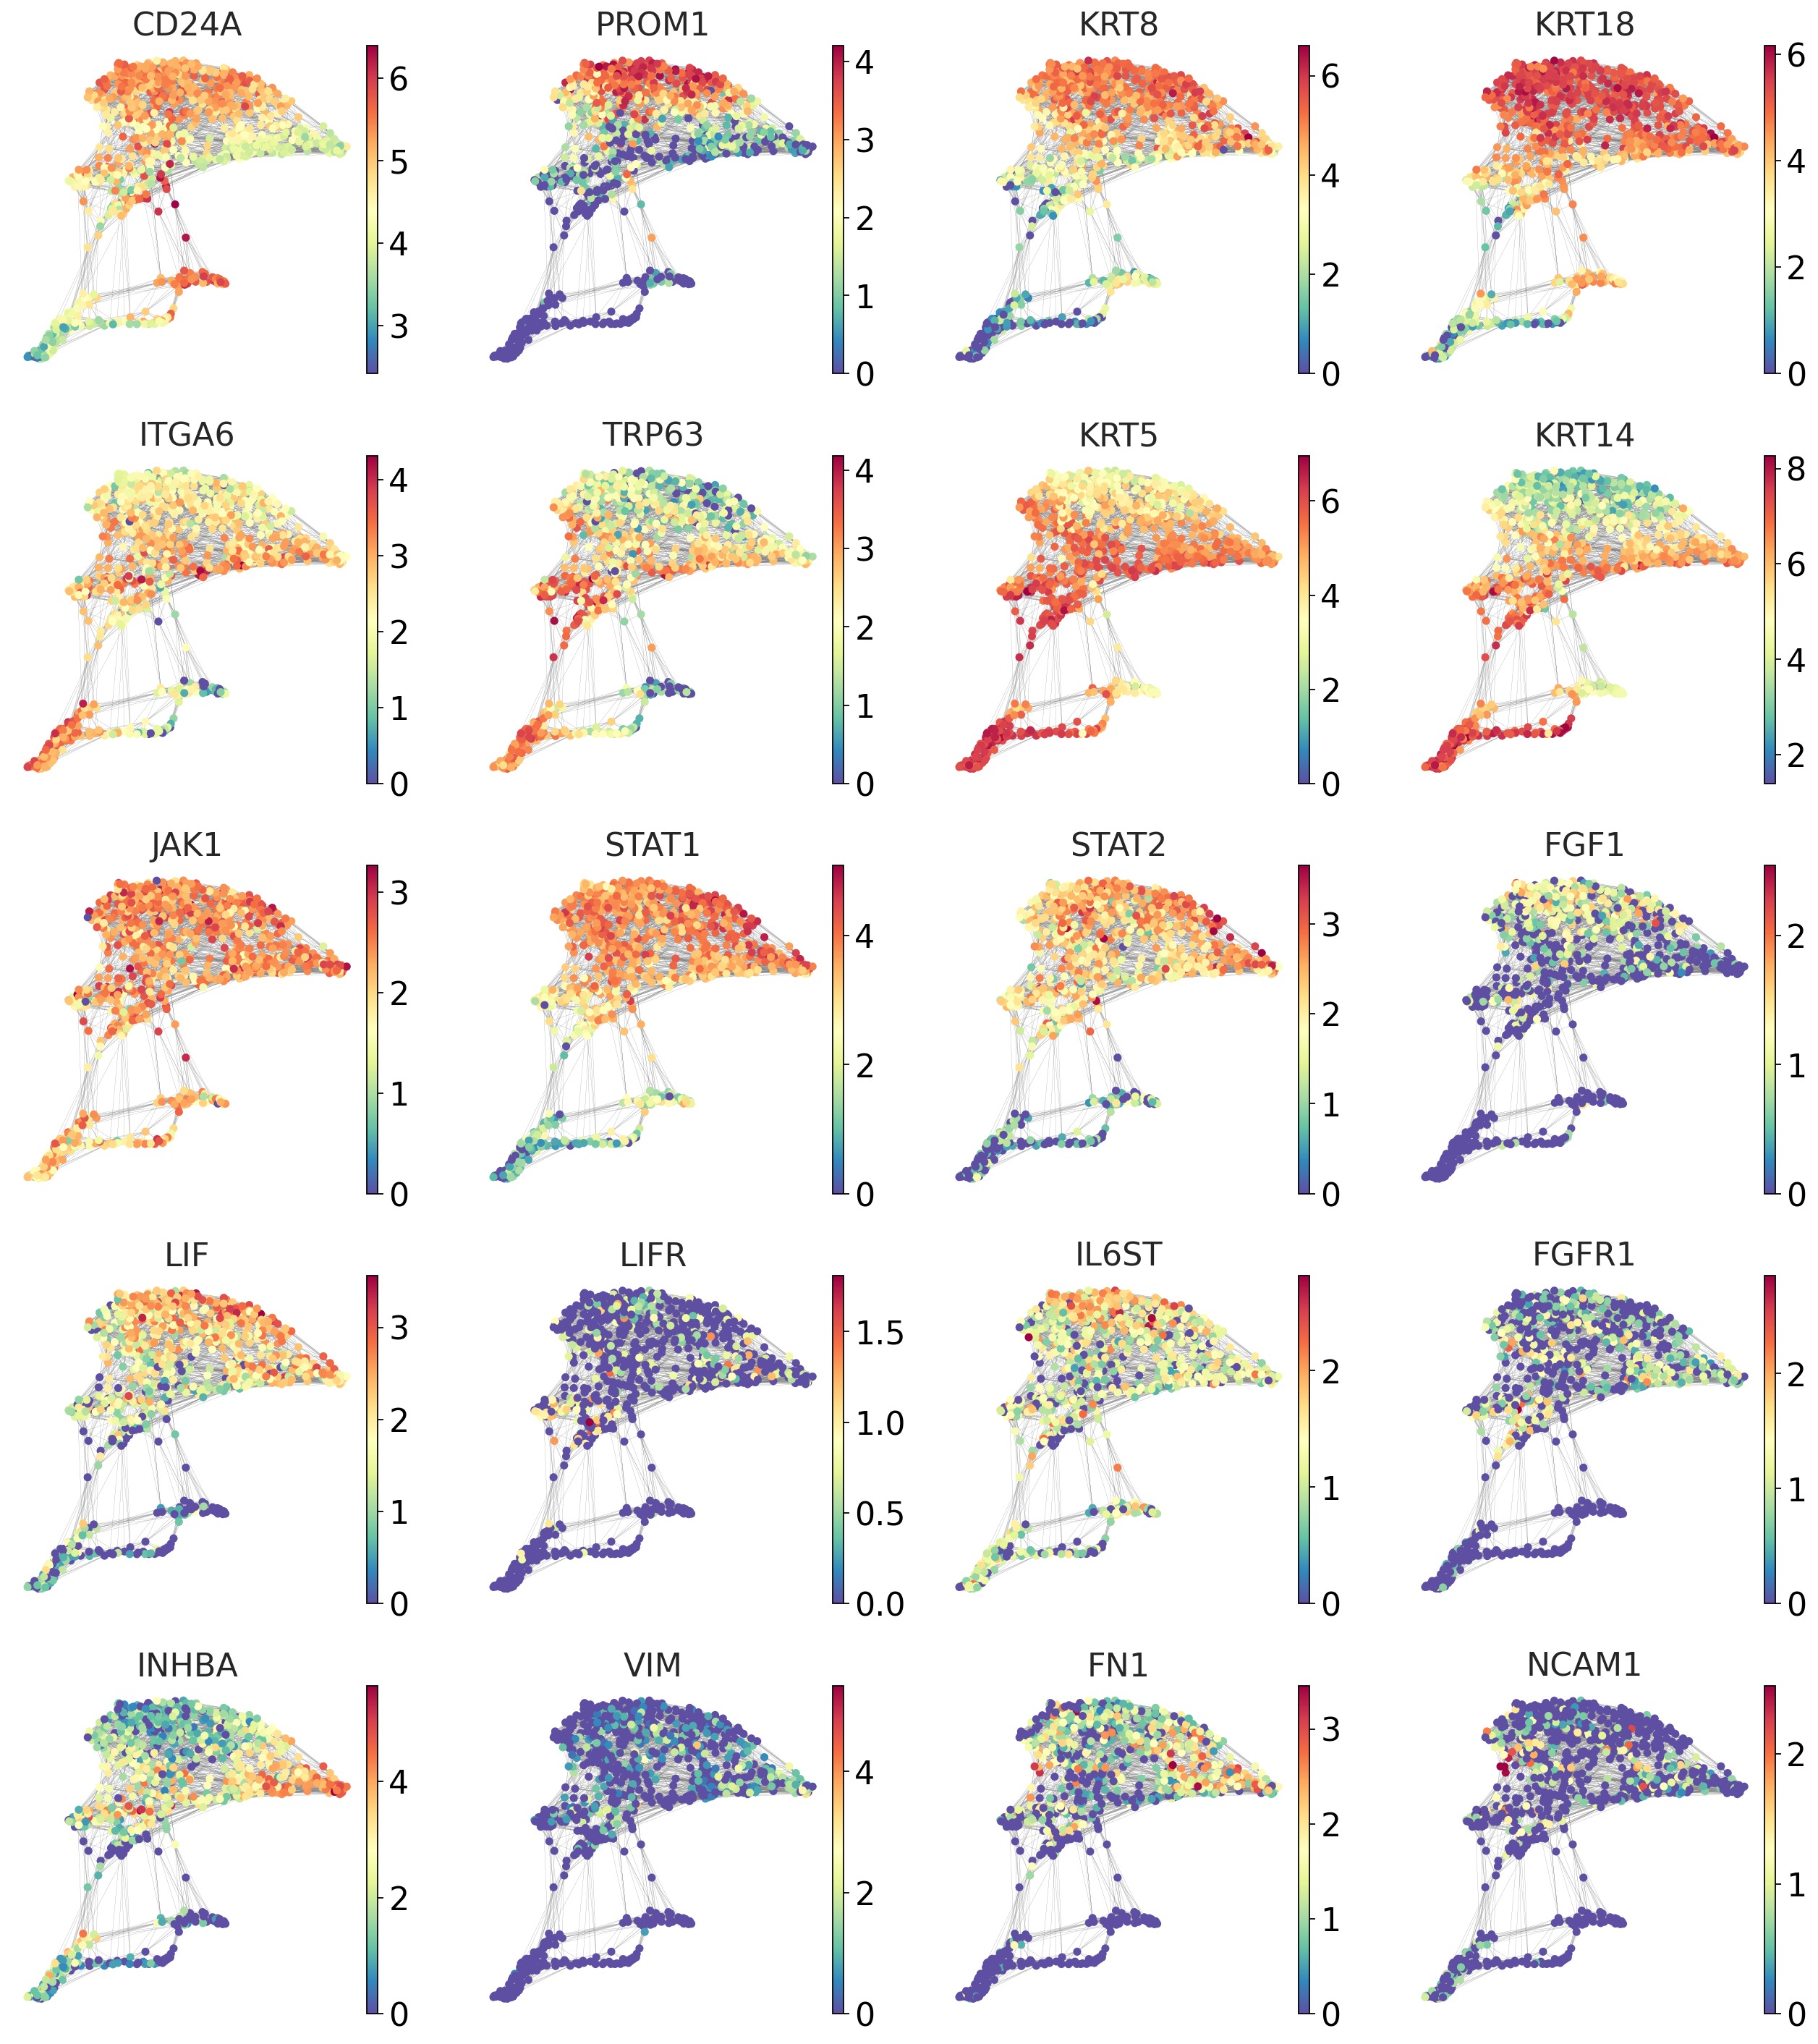

In [60]:
sc.pl.draw_graph(
    adata,
     color=[
           'CD24A','PROM1','KRT8','KRT18',
           'ITGA6','TRP63','KRT5','KRT14',
          'JAK1','STAT1','STAT2','FGF1',
          'LIF','LIFR','IL6ST','FGFR1',
          'INHBA','VIM','FN1','NCAM1'],
    color_map='Spectral_r',
    frameon=False, use_raw = False,
    sort_order=False, edges = True,
    ncols=4, s=100,
)

### Figure S5C

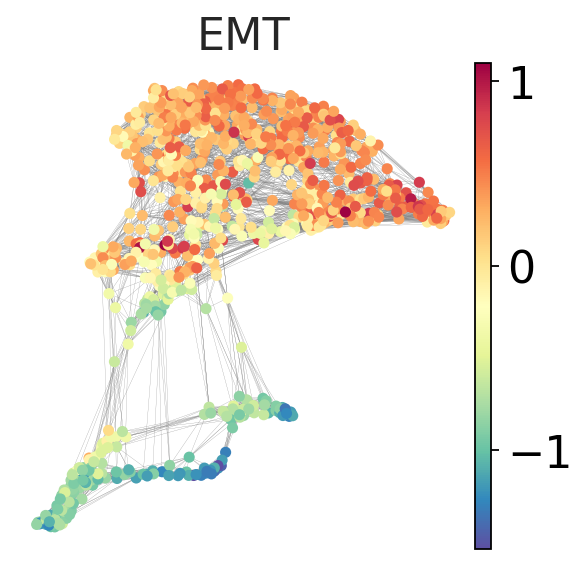

In [61]:
sc.pl.draw_graph(
    adata,
    color= ['HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION'],
    color_map='Spectral_r',
    frameon=False, use_raw = False,
    sort_order=False, edges = True,
    ncols=2, s=100, title='EMT',
)

### Figure S7A

In [29]:
sns.set_style('ticks')

In [30]:
import matplotlib.patches as mpatches


In [24]:
sc.set_figure_params(fontsize=15)

In [31]:
cmap = plt.cm.get_cmap(name='Pastel1')

/home/chanj3/anaconda3/envs/py3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


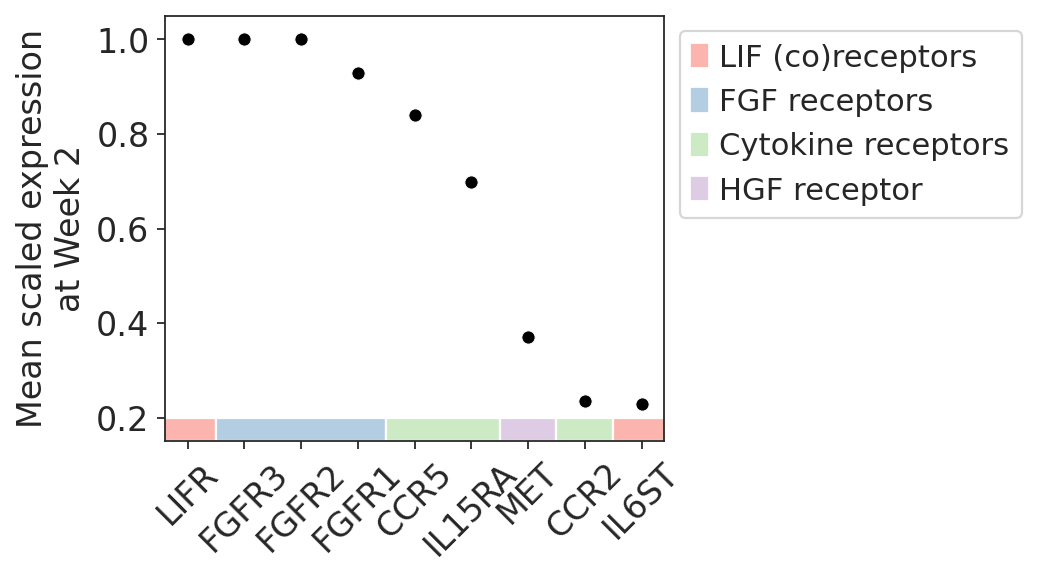

In [32]:
fig, ax = plt.subplots(1,1,figsize=(4,3.5))
plot_df= scaled_sub_df.loc['DHT 2'].sort_values(ascending=False)
sns.scatterplot(x=plot_df.index, y=plot_df, ax=ax, color = 'k')
ax.set_xticklabels(order, rotation = 45)
ax.set_ylabel('Mean scaled expression\nat Week 2')
ax.set_ylim([.15,1.05])
ax.add_patch(mpatches.Rectangle((-0.5,.15),1,.05, facecolor = cmap(0)))
ax.add_patch(mpatches.Rectangle((0.5,.15),3,.05, facecolor = cmap(1)))
ax.add_patch(mpatches.Rectangle((3.5,.15),2,.05, facecolor = cmap(2)))
ax.add_patch(mpatches.Rectangle((5.5,.15),1,.05, facecolor = cmap(3)))
ax.add_patch(mpatches.Rectangle((6.5,.15),1,.05, facecolor = cmap(2)))
ax.add_patch(mpatches.Rectangle((7.5,.15),1,.05, facecolor = cmap(0)))

p1 = mpatches.Patch(color=cmap(0), label='LIF (co)receptors')
p2 = mpatches.Patch(color=cmap(1), label='FGF receptors')
p3 = mpatches.Patch(color=cmap(2), label='Cytokine receptors')
p4 = mpatches.Patch(color=cmap(3), label='HGF receptor')

ax.legend(handles = [p1, p2, p3, p4], bbox_to_anchor = (1,1), loc='upper left')

### Figure S7B

In [33]:
cat_dict = {
    'LIFR': 'LIF (co)receptors',
    'IL6ST': 'LIF (co)receptors',
    'FGFR1': 'FGF receptors',
    'FGFR2': 'FGF receptors',
    'FGFR3': 'FGF receptors',
    'CCR5': 'Cytokine receptors',
    'CCR2': 'Cytokine receptors',
    'IL15RA': 'Cytokine receptors',
    'MET': 'HGF receptor'
}

In [34]:
plot_df = pd.concat([scaled_sub_df.loc['ENZ 8'] - scaled_sub_df.loc['DHT 8'],
                     scaled_sub_df.loc['ENZ 4'] - scaled_sub_df.loc['DHT 4']], axis=1)
plot_df.columns = [8,4]

In [35]:
plot_df.loc[:,'Receptor Type'] = plot_df.index.map(cat_dict).astype('category')

In [36]:
order = ['LIF (co)receptors', 'FGF receptors','Cytokine receptors', 'HGF receptor', ]

In [37]:
plot_df.loc[:,'Receptor Type'] = plot_df.loc[:,'Receptor Type'].cat.reorder_categories(order)

In [38]:
sns.set_style('ticks')

In [39]:
from adjustText import adjust_text

In [24]:
sc.set_figure_params(fontsize=15)

5

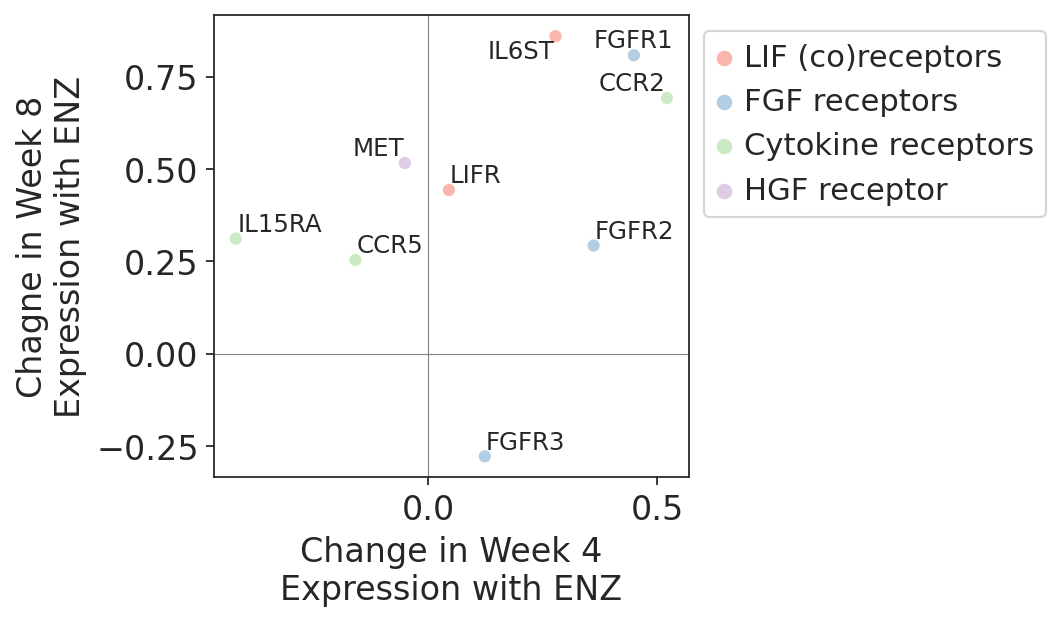

In [40]:
fig, ax = plt.subplots(1,1, figsize=(3.8,3.8))
sns.scatterplot(data = plot_df, x=plot_df.loc[:,4], y=plot_df.loc[:,8], hue = 'Receptor Type',
               palette = 'Pastel1', ax=ax)
ax.legend(bbox_to_anchor = (1,1), loc='upper left')
ax.axhline(0, color='gray', linewidth=0.5)
ax.axvline(0, color='gray', linewidth=0.5)
ax.set_xlabel('Change in Week 4\nExpression with ENZ')
ax.set_ylabel('Chagne in Week 8\nExpression with ENZ')

texts = []
for x, y, s in zip(plot_df.loc[:,4], plot_df.loc[:,8], plot_df.index):
    texts.append(plt.text(x, y, s, size = 11))
adjust_text(texts)
sc.set_figure_params(fontsize=15)